In [116]:
#Imports and Functions
import datetime as dt
import pandas as pd
import matplotlib

import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates

def peer_analysis(statistic):
    sns.set_theme()
    fig, ax = plt.subplots()
    sns.lineplot(ax = ax,
                data = stocks,
                x = stocks.index.get_level_values('Year').strftime('%Y'),
                y = stocks[statistic],
                hue = stocks.index.get_level_values('Ticker'),
                marker = 'o')

    plt.show()

In [117]:
#US10 Year Treasury Yield and Market Return 
us10 = yf.Ticker("^TNX")
BOND_YIELD = us10.info["previousClose"]/100
print("Bond Yield: " + str(BOND_YIELD))

SP500 = yf.download("^GSPC", start='2020-06-30', end ='2023-07-01').loc[['2020-06-30','2021-06-30', '2022-06-30', '2023-06-30'],['Close']]
SP500['Return'] = SP500['Close'].pct_change()
MARKET_CAR = (SP500['Close'][-1]/SP500['Close'][0])**(1/(len(SP500['Close'])-1))-1

print("Market 3 year Cumulative Average Return: " +str(MARKET_CAR))

Bond Yield: 0.049040003
[*********************100%%**********************]  1 of 1 completed
Market 3 year Cumulative Average Return: 0.12805840639244637


In [62]:
df_list = []
for ticker in ["CAR.AX", "REA.AX", "SEK.AX", "DHG.AX"]:
    stock = yf.Ticker(ticker)
    stock_data = pd.merge(stock.balance_sheet.T, stock.income_stmt.T, how='outer', left_index=True, right_index=True)
    stock_data = pd.merge(stock_data, stock.cash_flow.T, how = "outer", left_index = True, right_index = True )
    stock_data = stock_data[['Ordinary Shares Number','Total Debt','Common Stock Equity','Net Income','Total Revenue','Gross Profit','EBIT','Interest Expense','Operating Revenue','Operating Income','EBITDA','Tax Provision','Pretax Income','Free Cash Flow']]
    stock_data['ROE'] = (stock_data['Net Income']/stock_data['Common Stock Equity']*100).astype(float).round(2)
    stock_data['EPS'] = stock_data['Gross Profit']/stock_data['Ordinary Shares Number']
    stock_data['EPS Growth'] = stock_data['EPS'].pct_change(-1)*100
    stock_data['Ticker'] = ticker

    price_data = yf.download(ticker, start='2020-06-30', end ='2023-07-01').loc[['2020-06-30','2021-06-30', '2022-06-30', '2023-06-30'],['Close']]
    stock_data = pd.merge(stock_data, price_data, how='outer',left_index=True, right_index=True)
    stock_data['P/E'] = stock_data['Close']/stock_data['EPS']
    stock_data['Debt/Capital Ratio'] = (100*stock_data['Total Debt']/(stock_data['Total Debt']+stock_data['Common Stock Equity'])).astype(float).round(2)
    stock_data['Interest Coverage Ratio'] = stock_data['EBIT']/stock_data['Interest Expense']
    stock_data['Operating Margin'] = (100*stock_data['Operating Income']/stock_data['Operating Revenue']).astype(float).round(2)
    stock_data['EV/EBITDA'] = (stock_data['Total Debt']+stock_data['Common Stock Equity'])/stock_data['EBITDA']

    stock_data['Cost of Debt After Tax'] = (stock_data['Interest Expense']/stock_data['Total Debt'])*(1-(stock_data['Tax Provision']/stock_data['Pretax Income']))
    stock_data['Cost of Equity'] = BOND_YIELD + stock.info['beta']*(MARKET_CAR-BOND_YIELD)
    stock_data['Market Cap'] = stock_data['Ordinary Shares Number']*stock_data['Close']
    stock_data['WACC'] = (stock_data['Total Debt']/(stock_data['Total Debt'] + stock_data['Market Cap']))*stock_data['Cost of Debt After Tax'] + (stock_data['Market Cap']/(stock_data['Total Debt'] + stock_data['Market Cap']))*stock_data['Cost of Equity']
    stock_data['FCF Growth'] = stock_data['Free Cash Flow'].pct_change()


    stock_data = stock_data.reset_index()
    df_list.append(stock_data)

stocks = pd.concat(df_list, axis=0).set_index(['Ticker','index']).rename_axis(index={'index':'Year'})
stocks



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Ordinary Shares Number    Total Debt Common Stock Equity   
Ticker Year                                                                  
CAR.AX 2020-06-30            257630033.0   605215000.0         296449000.0  \
       2021-06-30            290999092.0   106582000.0         938736000.0   
       2022-06-30            285102283.0   714170000.0        1011560000.0   
       2023-06-30            376733547.0  1242569000.0        3069008000.0   
REA.AX 2020-06-30            131714699.0   327152000.0         864117000.0   
       2021-06-30            132117217.0   495603000.0        1069045000.0   
       2022-06-30            132117217.0   487000000.0        1302000000.0   
       2023-06-30            132117217.0   403200000.0        1466800000.0   
SEK.AX 2020-06-30            351783472.0  2005000000.0        1082500000.0   
       2021-06-30            352603870.0  1312400000.0        1834300000.0   
       2022-06-30            353381551.0  1566800000.0        1807100000.0   
       2023-06-30            354235646.0  1503200000.0        2675700000.0   
DHG.AX 2020-06-30            585932738.0   220349000.0         902461000.0   
       2021-06-30            586568024.0   217282000.0         948093000.0   
       2022-06-30            631657153.0   244467000.0        1105051000.0   
       2023-06-30            631657153.0   239506000.0        1092270000.0   

                     Net Income Total Revenue  Gross Profit         EBIT   
Ticker Year                                                                
CAR.AX 2020-06-30   114668000.0   395585000.0   362707000.0  185166000.0  \
       2021-06-30   130704000.0   427164000.0   405898000.0  204249000.0   
       2022-06-30   160816000.0   509077000.0   459051000.0  239627000.0   
       2023-06-30   645617000.0   781236000.0   720698000.0  753575000.0   
REA.AX 2020-06-30   112373000.0   881857000.0   881857000.0  242134000.0   
       2021-06-30   322677000.0  1005366000.0  1005366000.0  475208000.0   
       2022-06-30   384800000.0  1427400000.0  1427400000.0  556100000.0   
       2023-06-30   356100000.0  1392400000.0  1392400000.0  530400000.0   
SEK.AX 2020-06-30  -111700000.0  1577400000.0  1199900000.0   28700000.0   
       2021-06-30   752200000.0   760300000.0   755900000.0  182200000.0   
       2022-06-30   168800000.0  1116500000.0  1109900000.0  389900000.0   
       2023-06-30  1023600000.0  1225300000.0  1218000000.0  367900000.0   
DHG.AX 2020-06-30  -227676000.0   265385000.0   265385000.0 -206038000.0   
       2021-06-30    34270000.0   288773000.0   288773000.0   57002000.0   
       2022-06-30    35113000.0   356542000.0   356542000.0   67955000.0   
       2023-06-30    26098000.0   345463000.0   345463000.0   62090000.0   

                  Interest Expense Operating Revenue Operating Income  ...   
Ticker Year                                                            ...   
CAR.AX 2020-06-30       13126000.0       395585000.0      165688000.0  ...  \
       2021-06-30       17714000.0       427164000.0      201272000.0  ...   
       2022-06-30       16157000.0       509077000.0      223248000.0  ...   
       2023-06-30       53881000.0       781236000.0      293345000.0  ...   
REA.AX 2020-06-30        8440000.0       881857000.0      403236000.0  ...   
       2021-06-30        6848000.0      1005366000.0      457283000.0  ...   
       2022-06-30        8200000.0      1427400000.0      554700000.0  ...   
       2023-06-30       17500000.0      1392400000.0      541600000.0  ...   
SEK.AX 2020-06-30       74900000.0      1577400000.0      239900000.0  ...   
       2021-06-30       43900000.0       760300000.0      226200000.0  ...   
       2022-06-30       48000000.0      1116500000.0      384600000.0  ...   
       2023-06-30       72100000.0      1225300000.0      391300000.0  ...   
DHG.AX 2020-06-30        5705000.0       265385000.0       41673000.0  ...   
       2021-06-30        6084000.0       288773000.0       63730000.0  ...

In [129]:
#DCF Analysis for CAR.AX
fcf = stocks.loc['CAR.AX']['Free Cash Flow']
fcfg = (fcf[-1]/fcf[0])**(1-len(fcf))
fcfg = 0.09
ffcf=[]
ffcf.append(fcf[-1]*(1+fcfg))
for i in range(1, 10):
    ffcf.append(ffcf[i-1]*(1+fcfg))
terminal_value = ffcf[-1]*(1+fcfg)/(stocks.loc['CAR.AX']['WACC'][-1]-fcfg)
ffcf.append(terminal_value)

print("WACC :" + str(stocks.loc['CAR.AX']['WACC'][-1]))

npv = []
for idx, x in enumerate(ffcf):
    npv.append(x/(1 + stocks.loc['CAR.AX']['WACC'][-1])**(idx+1))
npv = sum(npv)
target_price = npv/stocks.loc['CAR.AX']['Ordinary Shares Number'][-1]
print("Enterprise Value: " + str(npv))
print("Target Price " + str(target_price))


WACC :0.10878015128017644
Enterprise Value: 11300507455.879068
Target Price 29.996021182257678


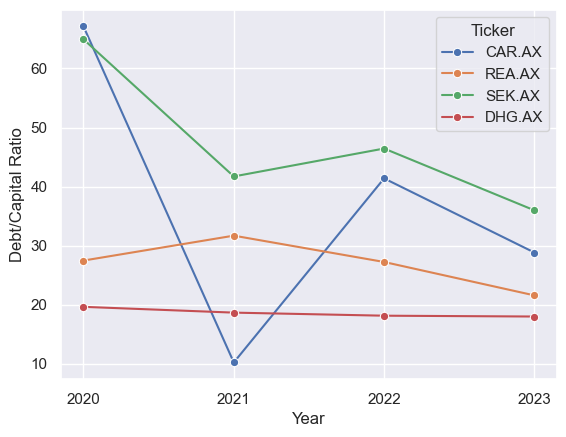

In [126]:
peer_analysis('Debt/Capital Ratio')

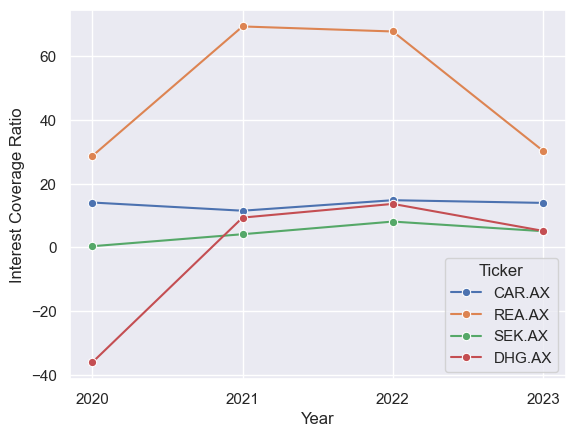

In [127]:
peer_analysis('Interest Coverage Ratio')

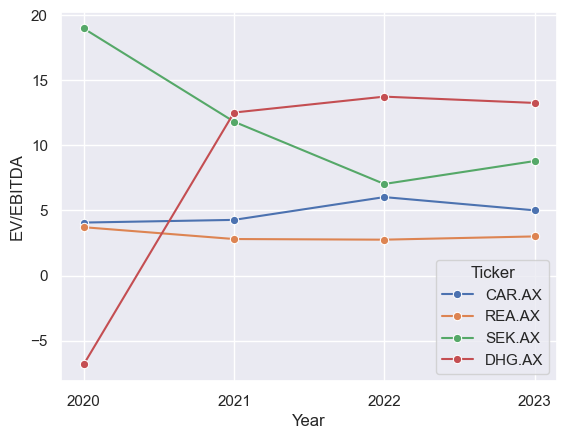

In [124]:
peer_analysis("EV/EBITDA")

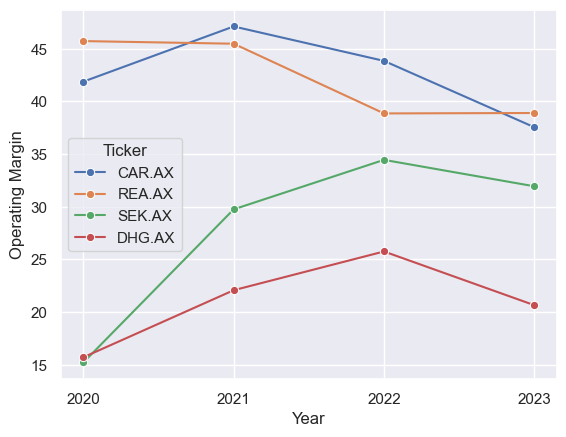

In [125]:
peer_analysis("Operating Margin")

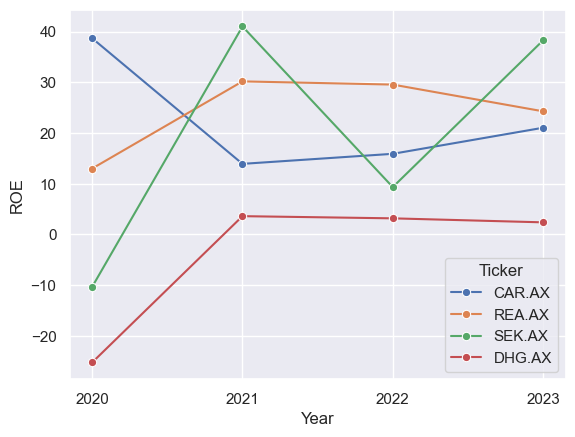

In [123]:
peer_analysis('ROE')

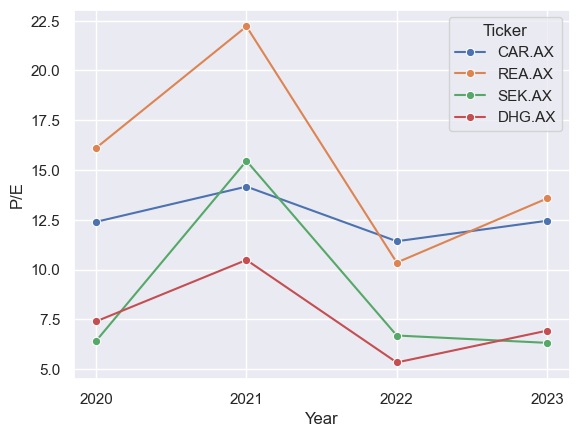

In [121]:
peer_analysis('P/E')

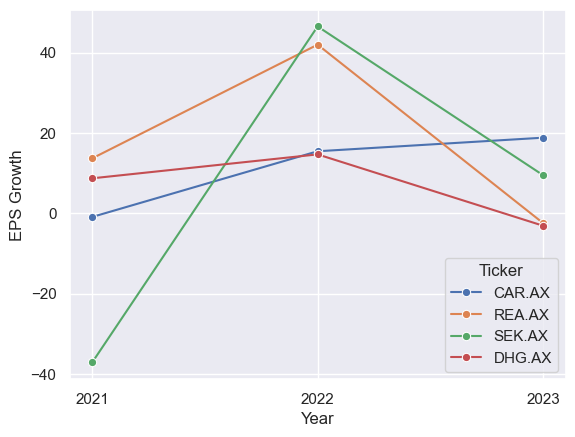

In [122]:
peer_analysis('EPS Growth')